In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

In [39]:
#READING THE GOOGLE PLAY STORE DATASET.
googlePlayStoredf = pd.read_csv('/content/drive/MyDrive/google_dataset/googleplaystore.csv')
#READING THE GOOGLE PLAY USER REVIEW DATASET.
googleUserRatingsdf = pd.read_csv('/content/drive/MyDrive/google_dataset/googleplaystore_user_reviews.csv')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
googlePlayStoredfCopy = googlePlayStoredf #Creating a copy of playstore dataframe
googleUserRatingsdfCopy = googleUserRatingsdf

In [42]:
googlePlayStoredf.head() #Displaying first few entries of the play store dataset.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
googleUserRatingsdf.head() #Displaying first few enteries of user ratings dataset

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [44]:
len(googleUserRatingsdf) #Calculating length of user rating dataset

64295

In [45]:
print(googlePlayStoredf.shape)  
print(googleUserRatingsdf.shape)

(10841, 13)
(64295, 5)


In [46]:
googlePlayStoredf.drop_duplicates(subset='App', inplace=True) #Dropping duplicate values of app name
print(googlePlayStoredf.shape) 

(9660, 13)


In [47]:
# Getting the ratio of Missing Values for each feature
googlePlayStoredfna = (googlePlayStoredf.isnull().sum() / len(googlePlayStoredf)) * 100
googlePlayStoredfna = googlePlayStoredfna.drop(googlePlayStoredfna[googlePlayStoredfna == 0].index).sort_values(ascending=False)
missingData = pd.DataFrame({'Missing Ratio' :googlePlayStoredfna}) 
missingData

,Missing Ratio
Rating,15.144928
Current Ver,0.082816
Android Ver,0.031056
Type,0.010352
Content Rating,0.010352


In [48]:
googlePlayStoredf.dropna(subset =['Rating'], inplace = True) #Removing null values from Rating
print(googlePlayStoredf.shape)

(8197, 13)


In [49]:
googlePlayStoredfna = (googlePlayStoredf.isnull().sum() / len(googlePlayStoredf)) * 100
googlePlayStoredfna = googlePlayStoredfna.drop(googlePlayStoredfna[googlePlayStoredfna == 0].index).sort_values(ascending=False)
missingData = pd.DataFrame({'Missing Ratio' :googlePlayStoredfna})  #Missing ratio
missingData

,Missing Ratio
Current Ver,0.048798
Android Ver,0.036599
Content Rating,0.012200


In [50]:
googlePlayStoredf["Current Ver"].value_counts().head()

Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
Name: Current Ver, dtype: int64

In [51]:
googlePlayStoredf['Current Ver'] = googlePlayStoredf['Current Ver'].fillna(googlePlayStoredf['Current Ver'].mode()[0]) #filling the Current Version columns with mode values
googlePlayStoredf['Android Ver'] = googlePlayStoredf['Android Ver'].fillna(googlePlayStoredf['Android Ver'].mode()[0]) #filling the Android Version columns with mode values
googlePlayStoredf['Content Rating'] = googlePlayStoredf['Content Rating'].fillna(googlePlayStoredf['Content Rating'].mode()[0]) #fill the Content Rating columns with the mode values

In [52]:
googlePlayStoredfna = (googlePlayStoredf.isnull().sum() / len(googlePlayStoredf)) * 100
googlePlayStoredfna = googlePlayStoredfna.drop(googlePlayStoredfna[googlePlayStoredfna == 0].index).sort_values(ascending=False)
missingData = pd.DataFrame({'Missing Ratio' :googlePlayStoredfna})
missingData

,Missing Ratio


In [53]:
googlePlayStoredf = googlePlayStoredf[~(googlePlayStoredf['Installs'] == "Free")].reset_index(drop=True)

In [54]:
## Basic Data Cleaning
#Remove '+' and ',' from 'Number of Installs' to make it numeric
googlePlayStoredf['Installs'] = googlePlayStoredf['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
googlePlayStoredf['Installs'] = googlePlayStoredf['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
googlePlayStoredf['Installs'] = googlePlayStoredf['Installs'].apply(lambda x: int(x))

In [55]:
googlePlayStoredf["Size"].value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

In [56]:
#Size Column - Conversion of Mbs to Kbs
googlePlayStoredf['Size'] = googlePlayStoredf['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x) 
googlePlayStoredf['Size'] = googlePlayStoredf['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
googlePlayStoredf['Size'] = googlePlayStoredf['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
googlePlayStoredf['Size'] = googlePlayStoredf['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [57]:
googlePlayStoredf['Size'] = googlePlayStoredf['Size'].apply(lambda x: float(x))
googlePlayStoredf['Installs'] = googlePlayStoredf['Installs'].apply(lambda x: float(x))

googlePlayStoredf['Price'] = googlePlayStoredf['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
googlePlayStoredf['Price'] = googlePlayStoredf['Price'].apply(lambda x: float(x))

googlePlayStoredf['Reviews'] = googlePlayStoredf['Reviews'].apply(lambda x: int(x))

In [58]:
googlePlayStoredf.dtypes #data types of the features

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [59]:
mergedf=googlePlayStoredf.merge(googleUserRatingsdf,how="inner",on="App") #dataframe merging
sentimentAnadf=mergedf.groupby(['App','Sentiment'])['Reviews'].count().reset_index()
pivted = pd.pivot_table(sentimentAnadf,
                         index='App',
                         columns='Sentiment',
                         values='Reviews',
                         aggfunc=sum)
pivotedSentiment=pivted.reset_index()[['App','Positive']] #pivoted table

In [60]:
len(mergedf['App'].unique()) #length of the merged dataframe

1020

In [61]:
len(googlePlayStoredf)

8196

In [62]:
# Logistic Regression
from sklearn.metrics import confusion_matrix   #importing confusion matrix
def bucket_Install(a):
    if a<=10000:
        return 'Low'
    elif (a>10000 and a<=1000000):
        return 'Medium'
    elif (a>1000000):
        return 'High'

In [63]:
logisticdf=googlePlayStoredf[['Installs','Reviews','Category','Content Rating','Type','Genres','Size']]
logisticdf=pd.get_dummies(logisticdf)  # converting data by manipulation of data
logisticdf['Installs']=logisticdf['Installs'].map(bucket_Install)

In [64]:
len(logisticdf)

8196

In [65]:
logisticdf

,Installs,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Low,159,19.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Medium,967,14.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,High,87510,8.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,High,215644,25.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Medium,967,2.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,Low,7,2.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8192,Low,38,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8193,Low,4,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8194,Low,114,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
logisticdf = logisticdf.dropna(subset=['Size']) 

In [67]:
X=logisticdf.drop('Installs',axis=1)
y=logisticdf['Installs'].values
y=y.astype('str')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrC=LogisticRegression(random_state=0)
lrC.fit(X_train,y_train)
lrPred=lrC.predict(X_test)
lrConfusionMatrix=confusion_matrix(y_test,lrPred)
lrAc=accuracy_score(y_test, lrPred)
print('Logistic Regression accuracy is:',lrAc)

Logistic Regression accuracy is: 0.6749644381223329


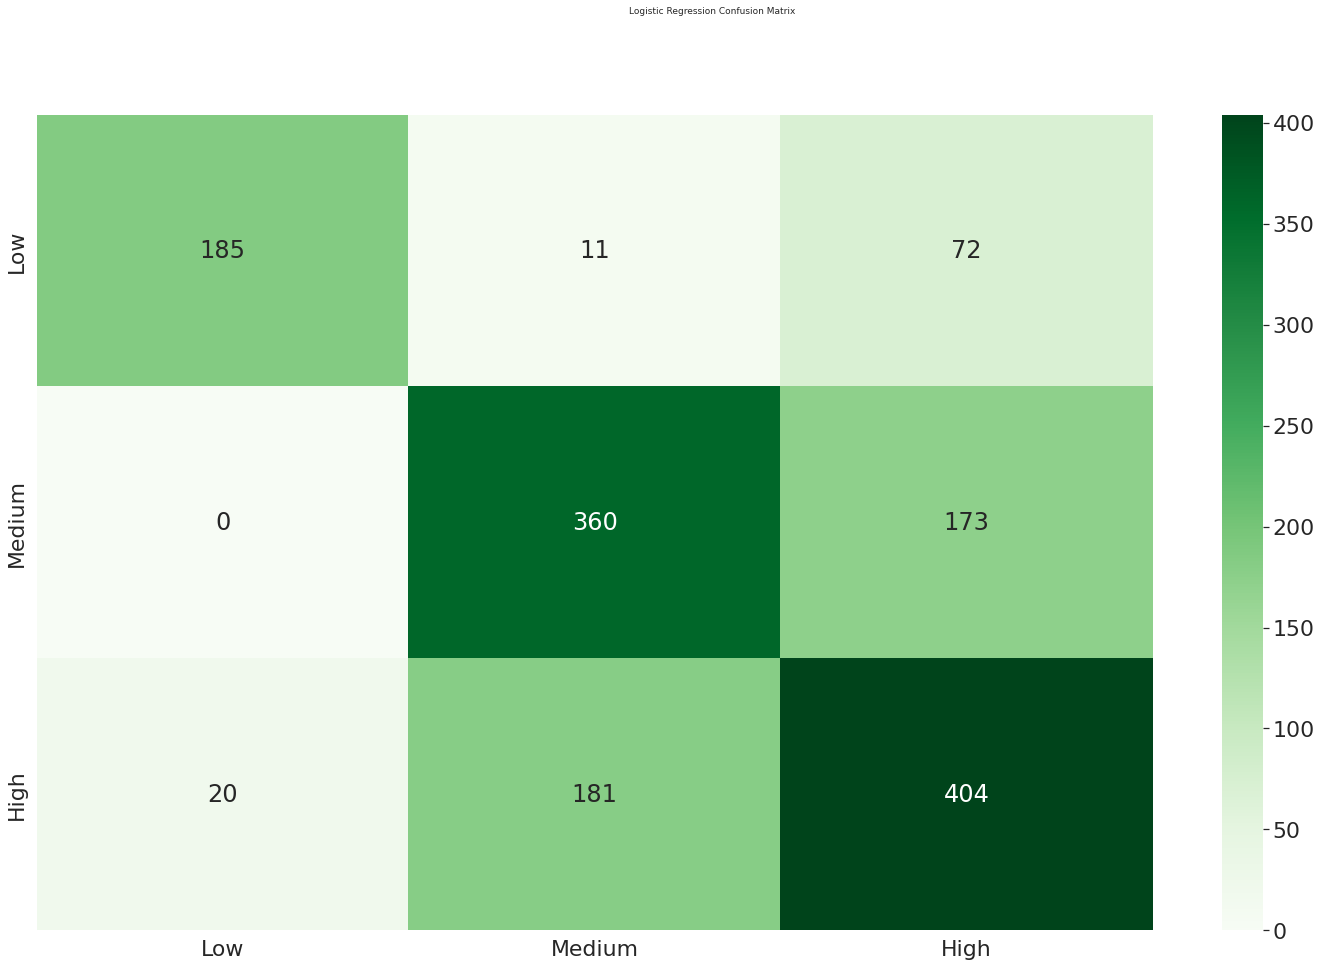

In [70]:
# Logistic Regression Confusion Matrix
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Logistic Regression Confusion Matrix', fontsize=9)
sns.heatmap(lrConfusionMatrix,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Greens",fmt="d")

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
randdf=logisticdf #randomdf
randdf.columns


Index(['Installs', 'Reviews', 'Size', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=158)

In [73]:
rdfC=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0) #RandomForestClassifier implementation
rdfC.fit(X_train,y_train)
rdfPred=rdfC.predict(X_test)
rdfConfusionMatrix=confusion_matrix(y_test,rdfPred)
rdfAc=accuracy_score(rdfPred,y_test)


In [74]:
rdfAc

0.8648648648648649

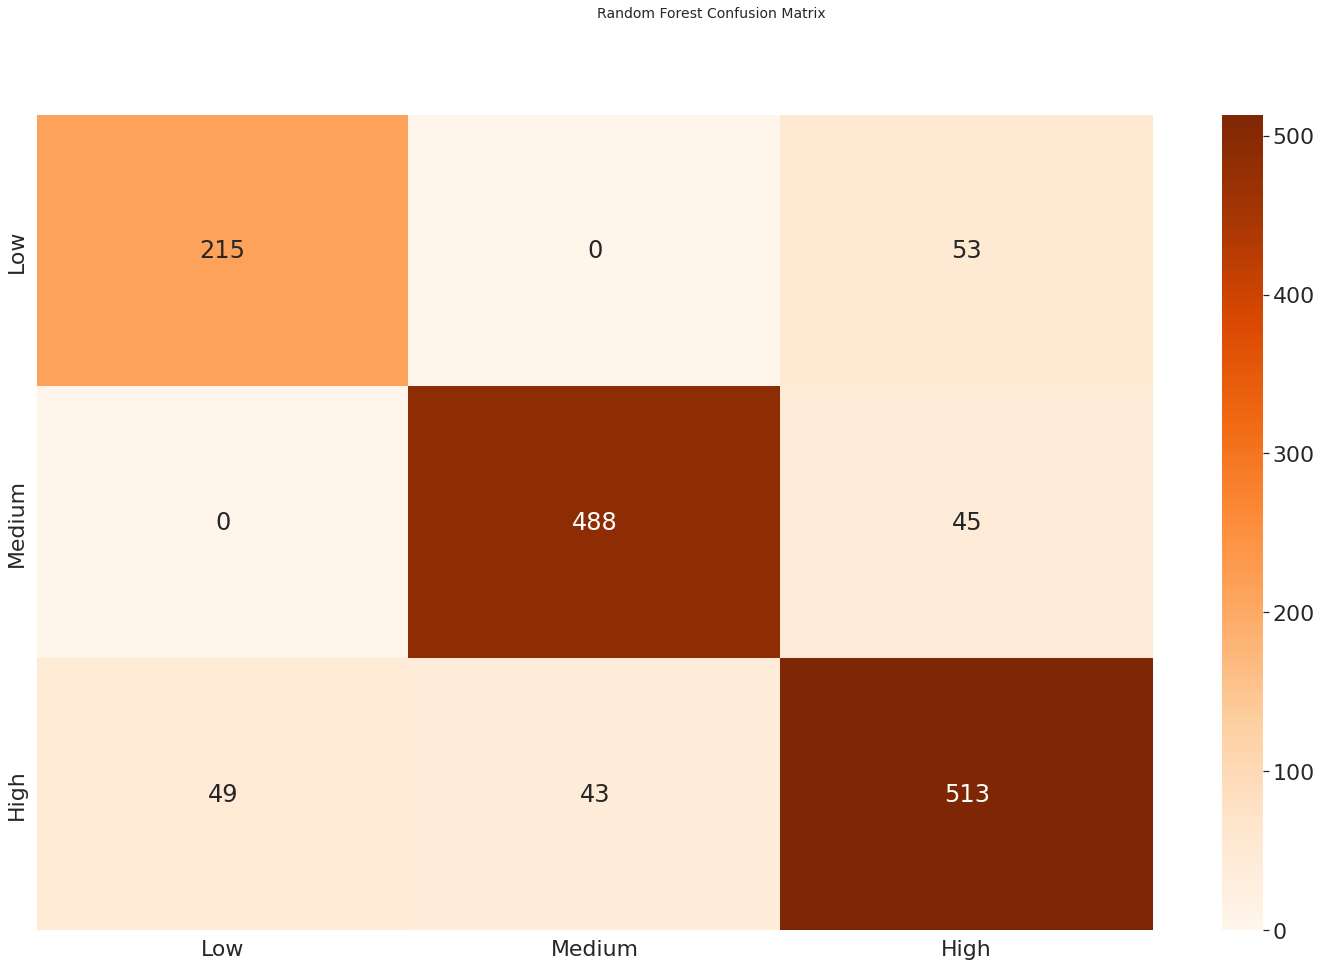

In [75]:
# RandomForest implement without tuning Confusion Matrix
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix', fontsize=14)
sns.heatmap(rdfConfusionMatrix,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Oranges",fmt="d")


In [76]:

from sklearn.model_selection import RandomizedSearchCV

# No. of trees in random forest 
nEstimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# No. of features to be considered at each split
maxFeatures = ['auto', 'sqrt']
# Maximum no. of levels in tree
maxDepth = [int(x) for x in np.linspace(10, 110, num = 11)]
maxDepth.append(None)
# Minimum number of samples needed to split a node 
minSamplesSplit = [2, 5, 10]
# Minimum number of samples needed at every leaf node
minSamplesLeaf = [1, 2, 4]
# Method for sample selection for training every tree
bootStrap = [True, False]
# Creation of the Random Grid
randomGrid = {'n_estimators': nEstimators,
               'max_features': maxFeatures,
               'max_depth': maxDepth,
               'min_samples_split': minSamplesSplit,
               'min_samples_leaf': minSamplesLeaf,
               'bootstrap': bootStrap}
print(randomGrid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [77]:
# To search for the best hyperparameters random grid is used.
# Firstly creating the base model in order to tune
rf = RandomForestClassifier()
# Using 3 fold cross validation, random search of parameters 
# searching across 100 different combinations, and use all available cores
rfRandom = RandomizedSearchCV(estimator = rf, param_distributions = randomGrid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfRandom.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [78]:
rfRandom.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [79]:
rdfC=RandomForestClassifier(n_estimators=1200,criterion='entropy',random_state=0,max_depth=20, min_samples_leaf= 2,min_samples_split=5,max_features='sqrt')
rdfC.fit(X_train,y_train)
rdfPred=rdfC.predict(X_test)
rdfConfusionMatrix=confusion_matrix(y_test,rdfPred)
rdfAc=accuracy_score(rdfPred,y_test)

In [80]:
rdfAc

0.8805120910384068

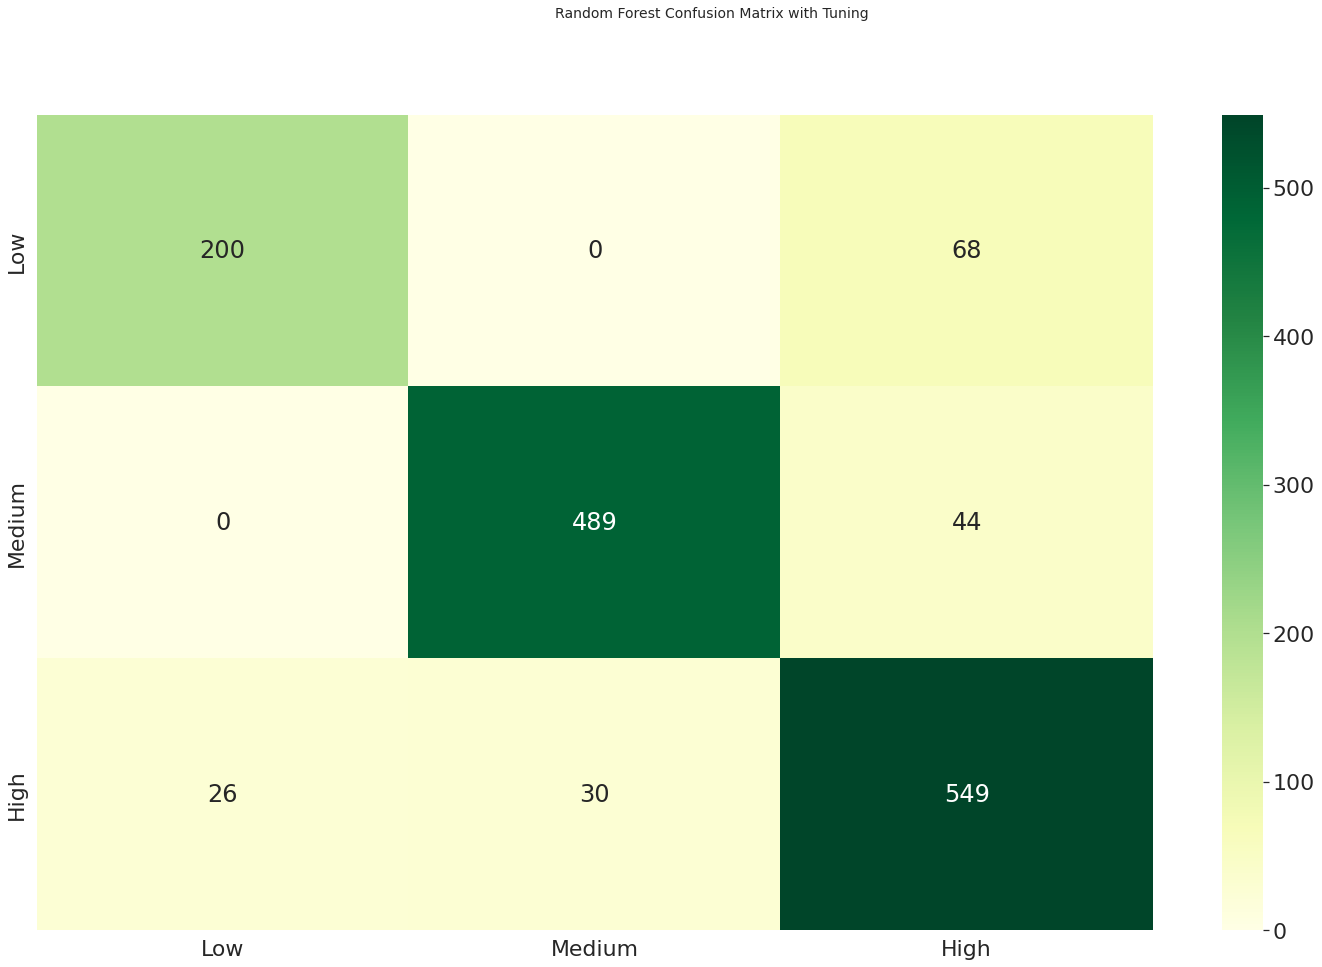

In [81]:
#Random Forest confusion matrix after parameter tuning
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix with Tuning', fontsize=14)
sns.heatmap(rdfConfusionMatrix,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlGn",fmt="d")

In [82]:
X.loc[:1:].columns

Index(['Reviews', 'Size', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [83]:
import pandas as pd
feature_importances = pd.DataFrame(rdfC.feature_importances_,
                                   index = X.loc[:1:].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [84]:
feature_importances.reset_index(inplace=True)
feature_importances.columns=['Features','Importance']
feature_importances.to_csv("Feature_Imp.csv",header=True)

In [85]:
# Decision Tree Confusion Matrix
from sklearn.tree import DecisionTreeClassifier
dtreeC=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtreeC.fit(X_train,y_train)
dtreePred=dtreeC.predict(X_test)
dtreeCofusionMatrix=confusion_matrix(y_test,dtreePred)
accuracy_score(dtreePred,y_test)

0.8570412517780939

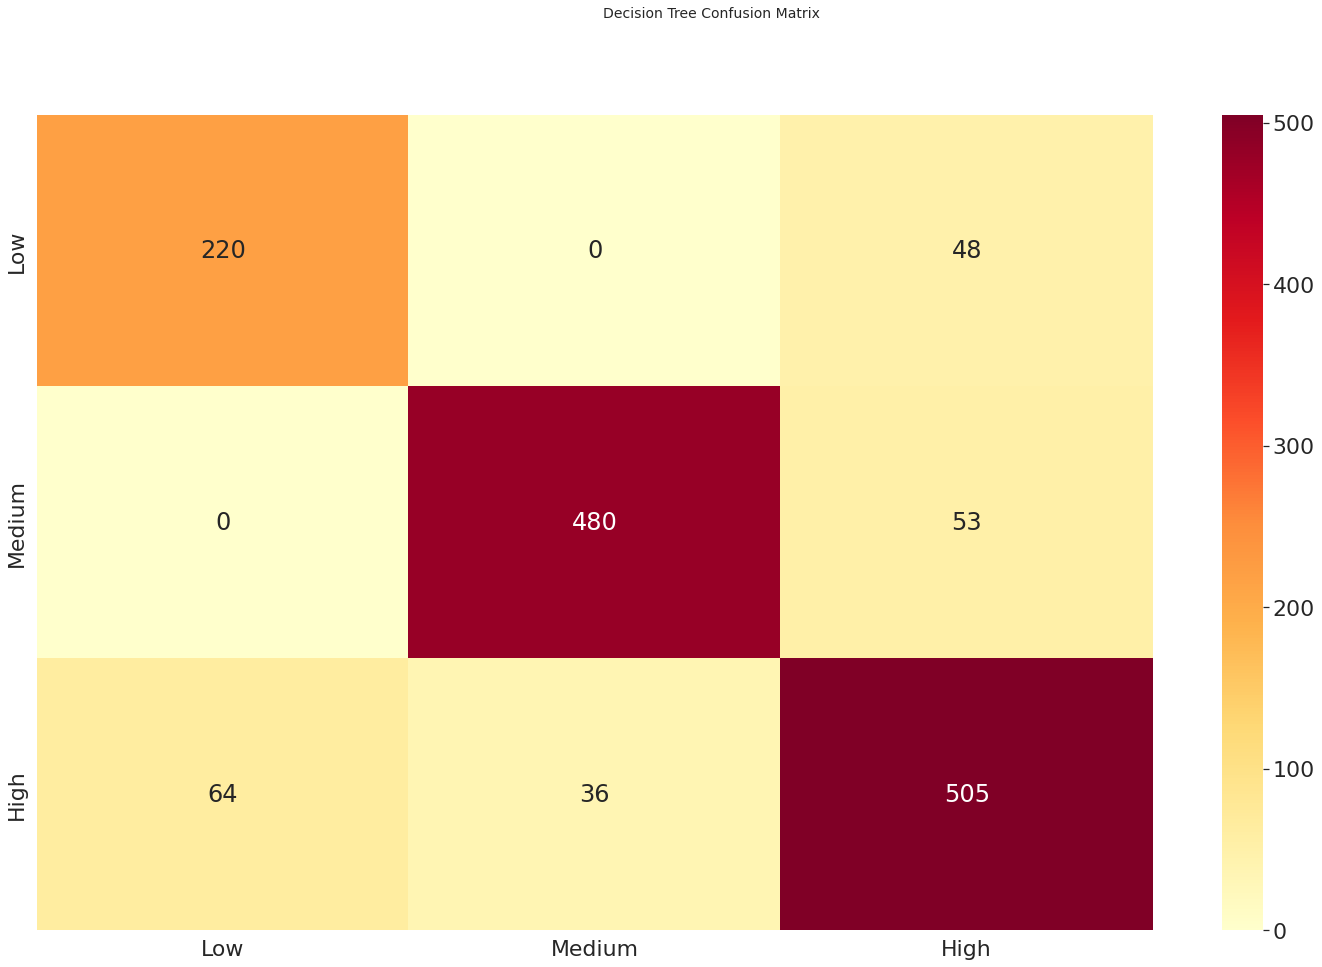

In [87]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Decision Tree Confusion Matrix', fontsize=14)
sns.heatmap(dtreeCofusionMatrix,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlOrRd",fmt="d")


In [88]:
logisticData=googlePlayStoredf[['Rating','Reviews','Category','Content Rating','Type','Genres']]
logisticData=pd.get_dummies(logisticData)
X=logisticData.drop('Rating',axis=1)
y=logisticData['Rating'].values
y=y.astype('int')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
scX=StandardScaler()
X_train=scX.fit_transform(X_train)
X_test=scX.transform(X_test)

#Accuracy Score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrC=LogisticRegression(random_state=0)
lrC.fit(X_train,y_train)
lrPred=lrC.predict(X_test)
#lr_cm=confusion_matrix(y_test,lr_pred)
lrAc=accuracy_score(y_test, lrPred)
print('Logistic Regression accuracy is:',lrAc)


Logistic Regression accuracy is: 0.75


In [89]:
googlePlayStoredfModel=pd.get_dummies(logisticData)#,columns=columns)
googlePlayStoredfModel.head(10)


,Rating,Reviews,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.8,178,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.1,36815,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.4,13791,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.7,121,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#Converting reviews and ratings to float type 

googlePlayStoredf["Reviews"] = pd.to_numeric(googlePlayStoredf.Reviews, errors='coerce')

googlePlayStoredf["Rating"] = pd.to_numeric(googlePlayStoredf.Rating,errors='coerce')

In [94]:
#Calculating the mean rating for the apps in the Play Store

C = googlePlayStoredf['Rating'].mean()

print("The mean rating of an app on a scale of 5 is", %.0fC)

The mean rating of an app on a scale of 5 is 4.173243045387993
